<h3 align="Center"><b>Stock Contents</h3>

| Terms          | Definitions                             |
|:--------------:|:---------------------------------------:|
| **Apple**      | Stock brand                             |
| **AAPL**       | Ticker Symbol                           |
| **NASDAQ**     | Market Exchange                         |
| **Bullish**    | Positive - stock expecting to be up     |
| **Rally**      | Positive - strong upward stock movement |
| **Downgrade**  | Negative - lower rating on stock        |
| **Returns**    | Percentage change in price              |
| **Volatility** | Price fluctuation (SD of returns)       |


##  **Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

## **Loading Dataset**

In [2]:
ds = pd.read_csv("Datasets/AAPL.csv")

> ### ***Exploring DataSet***

In [3]:
ds.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)

| Column               | Meaning                                                             |
| -------------------- | ------------------------------------------------------------------- |
| **Date / Timestamp** | The date (or date-time) of the trading session.                     |
| **Open**             | Price at which the stock opened on that date.                       |
| **High**             | Highest price the stock reached during that trading session.        |
| **Low**              | Lowest price the stock reached during that trading session.         |
| **Close**            | Price at which the stock closed on that date.                       |
| **Adj Close**        | Adjusted close price (corrected for stock splits, dividends, etc.). |
| **Volume**           | Total number of shares traded that day.                             |

In [5]:
ds.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.51,0.52,0.51,0.51,0.41,117258400.00
1,1980-12-15,0.49,0.49,0.49,0.49,0.39,43971200.00
2,1980-12-16,0.45,0.45,0.45,0.45,0.36,26432000.00
3,1980-12-17,0.46,0.46,0.46,0.46,0.37,21610400.00
4,1980-12-18,0.48,0.48,0.48,0.48,0.38,18362400.00


In [6]:
ds.shape

(9823, 7)

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9823 non-null   object 
 1   Open       9822 non-null   float64
 2   High       9822 non-null   float64
 3   Low        9822 non-null   float64
 4   Close      9822 non-null   float64
 5   Adj Close  9822 non-null   float64
 6   Volume     9822 non-null   float64
dtypes: float64(6), object(1)
memory usage: 537.3+ KB


In [8]:
ds.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [9]:
ds.duplicated().sum()

np.int64(0)

In [10]:
ds[ds["Open"].isnull()]

,Date,Open,High,Low,Close,Adj Close,Volume
165,1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ds.iloc[160:171]

,Date,Open,High,Low,Close,Adj Close,Volume
160,1981-08-03,0.45,0.45,0.44,0.44,0.35,3108000.00
161,1981-08-04,0.45,0.45,0.45,0.45,0.36,7918400.00
162,1981-08-05,0.46,0.46,0.46,0.46,0.37,4373600.00
163,1981-08-06,0.45,0.45,0.45,0.45,0.36,2632000.00
164,1981-08-07,0.45,0.45,0.45,0.45,0.36,2301600.00
165,1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN
166,1981-08-11,0.44,0.44,0.44,0.44,0.35,17864000.00
167,1981-08-12,0.43,0.43,0.43,0.43,0.34,6568800.00
168,1981-08-13,0.42,0.42,0.42,0.42,0.33,6871200.00
169,1981-08-14,0.41,0.41,0.41,0.41,0.32,6048000.00


> ### ***Time Series Conversion***

In [12]:
ds['Date'] = pd.to_datetime(ds['Date'])

In [13]:
ds['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9823 entries, 0 to 9822
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
9823 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 76.9 KB


In [14]:
ds.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
9820,2019-11-21,263.69,264.01,261.18,262.01,262.01,30348800.00
9821,2019-11-22,262.59,263.18,260.84,261.78,261.78,16331300.00
9822,2019-11-25,262.71,266.44,262.52,266.37,266.37,21005100.00


In [15]:
ds = ds.set_index(ds['Date'])

In [16]:
ds

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1980-12-12,1980-12-12,0.51,0.52,0.51,0.51,0.41,117258400.00
1980-12-15,1980-12-15,0.49,0.49,0.49,0.49,0.39,43971200.00
1980-12-16,1980-12-16,0.45,0.45,0.45,0.45,0.36,26432000.00
1980-12-17,1980-12-17,0.46,0.46,0.46,0.46,0.37,21610400.00
1980-12-18,1980-12-18,0.48,0.48,0.48,0.48,0.38,18362400.00
...,...,...,...,...,...,...,...
2019-11-19,2019-11-19,267.90,268.00,265.39,266.29,266.29,19041800.00
2019-11-20,2019-11-20,265.54,266.08,260.40,263.19,263.19,26558600.00
2019-11-21,2019-11-21,263.69,264.01,261.18,262.01,262.01,30348800.00


In [17]:
# Checking Date ordered low to high

ds.index.is_monotonic_increasing

True

> ### ***Handling Missing Values***

In [18]:
ds.drop(columns=["Date"], inplace=True)

In [19]:
ds = ds.interpolate(method="time").ffill()

In [20]:
ds.iloc[163:168]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-08-06,0.45,0.45,0.45,0.45,0.36,2632000.00
1981-08-07,0.45,0.45,0.45,0.45,0.36,2301600.00
1981-08-10,0.44,0.44,0.44,0.44,0.35,13973400.00
1981-08-11,0.44,0.44,0.44,0.44,0.35,17864000.00
1981-08-12,0.43,0.43,0.43,0.43,0.34,6568800.00


> ### ***Feature Engineering***

#### ***1. Introducing New Day Gap Column***

In [21]:
## Checking Date Frequency in dataset

print("Start Date : ", ds.index.min())
print("Start Date : ", ds.index.max())
print("Frequency  : ", ds.index.freq)

Start Date :  1980-12-12 00:00:00
Start Date :  2019-11-25 00:00:00
Frequency  :  None


In [22]:
full_range = pd.date_range(start=ds.index.min(), end=ds.index.max(), freq='D')
print(len(full_range))

14228


In [23]:
missing_days = full_range.difference(ds.index)
print(len(missing_days))

4405


In [24]:
missing_days[-10:]

DatetimeIndex(['2019-10-26', '2019-10-27', '2019-11-02', '2019-11-03',
               '2019-11-09', '2019-11-10', '2019-11-16', '2019-11-17',
               '2019-11-23', '2019-11-24'],
              dtype='datetime64[ns]', freq=None)

In [25]:
type(ds.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [26]:
# Finding Day Difference for consecutive days
##                   0 - First day
##             col[curr_index]-col[prev_index]

ds['Date'] = ds.index
ds['Day Gap'] = (ds['Date'] - ds['Date'].shift(1)).dt.days.fillna(0).astype(float)
ds.drop(columns=['Date'], inplace=True)
ds.head(2)

,Open,High,Low,Close,Adj Close,Volume,Day Gap
Date,,,,,,,
1980-12-12,0.51,0.52,0.51,0.51,0.41,117258400.00,0.00
1980-12-15,0.49,0.49,0.49,0.49,0.39,43971200.00,3.00


In [27]:
ds['Day Gap'].value_counts()

Day Gap
1.00    7698
3.00    1790
4.00     240
2.00      91
5.00       2
0.00       1
7.00       1
Name: count, dtype: int64

In [28]:
ds.tail(2)

,Open,High,Low,Close,Adj Close,Volume,Day Gap
Date,,,,,,,
2019-11-22,262.59,263.18,260.84,261.78,261.78,16331300.00,1.00
2019-11-25,262.71,266.44,262.52,266.37,266.37,21005100.00,3.00


In [68]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9823 entries, 1980-12-12 to 2019-11-25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9823 non-null   float64
 1   High       9823 non-null   float64
 2   Low        9823 non-null   float64
 3   Close      9823 non-null   float64
 4   Adj Close  9823 non-null   float64
 5   Volume     9823 non-null   float64
 6   Day Gap    9823 non-null   float64
dtypes: float64(7)
memory usage: 872.0 KB


In [29]:
ds.to_csv("Datasets/aapl_preprocessed.csv")

> ### ***Univariate Analysis***
> Box Plot

In [37]:
ds.describe()

,Open,High,Low,Close,Adj Close,Volume,Day Gap
count,9823.00,9823.00,9823.00,9823.00,9823.00,9823.00,9823.00
mean,30.35,30.64,30.05,30.35,28.36,86199842.45,1.45
std,53.44,53.91,52.98,53.46,51.60,86230071.46,0.87
min,0.20,0.20,0.20,0.20,0.16,347200.00,0.00
25%,1.06,1.08,1.04,1.07,0.91,33180000.00,1.00
50%,1.71,1.74,1.67,1.71,1.45,57988000.00,1.00
75%,30.39,30.55,29.87,30.23,26.31,107630600.00,1.00
max,267.90,268.00,265.39,267.10,267.10,1855410200.00,7.00


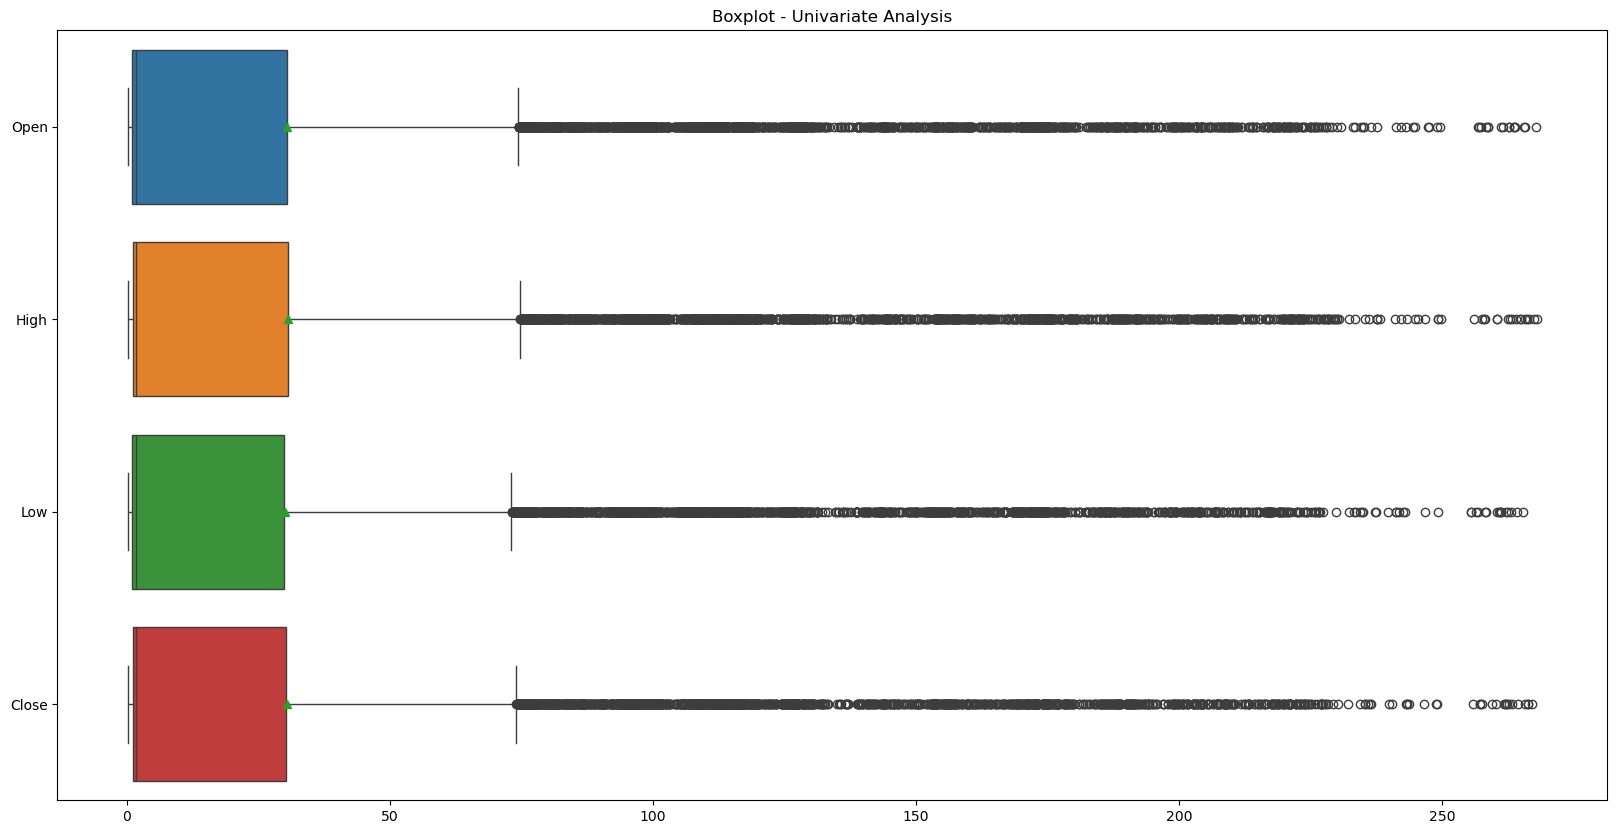

In [42]:
fig = plt.figure(figsize=(20,10))

sns.boxplot(data=ds.iloc[:,:-3], orient='h', showmeans=True)
plt.title("Boxplot - Univariate Analysis")
plt.show()

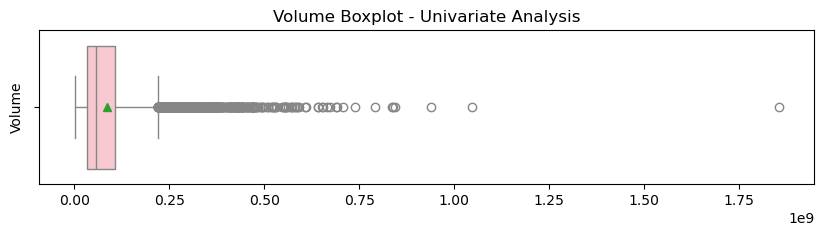

In [43]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=ds.iloc[:, -2], orient='h', showmeans=True, color="pink")
plt.title("Volume Boxplot - Univariate Analysis")
plt.ylabel("Volume")
plt.xlabel("")
plt.show()

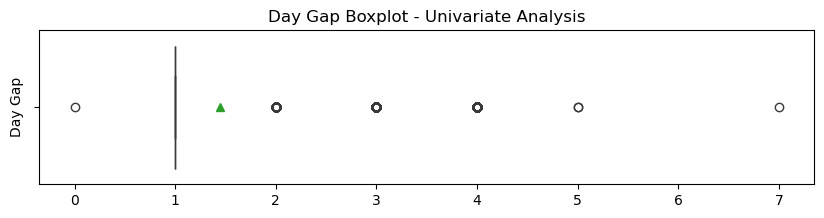

In [44]:
plt.figure(figsize=(10, 2))
sns.boxplot(data=ds.iloc[:, -1], orient='h', showmeans=True, color="m")
plt.title("Day Gap Boxplot - Univariate Analysis")
plt.ylabel("Day Gap")
plt.xlabel("")
plt.show()

In [45]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9823 entries, 1980-12-12 to 2019-11-25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9823 non-null   float64
 1   High       9823 non-null   float64
 2   Low        9823 non-null   float64
 3   Close      9823 non-null   float64
 4   Adj Close  9823 non-null   float64
 5   Volume     9823 non-null   float64
 6   Day Gap    9823 non-null   float64
dtypes: float64(7)
memory usage: 872.0 KB


> Count Plot

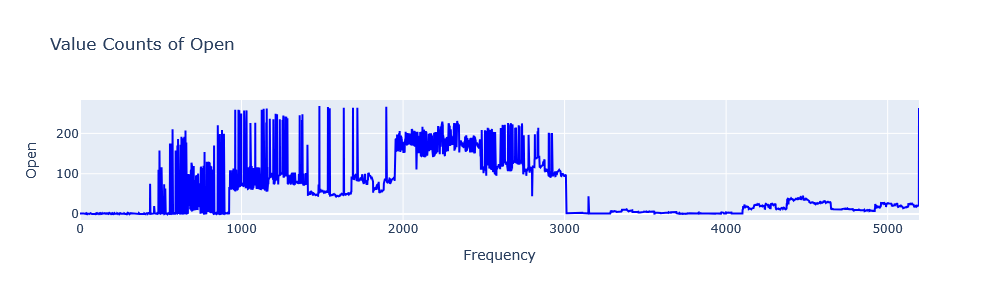

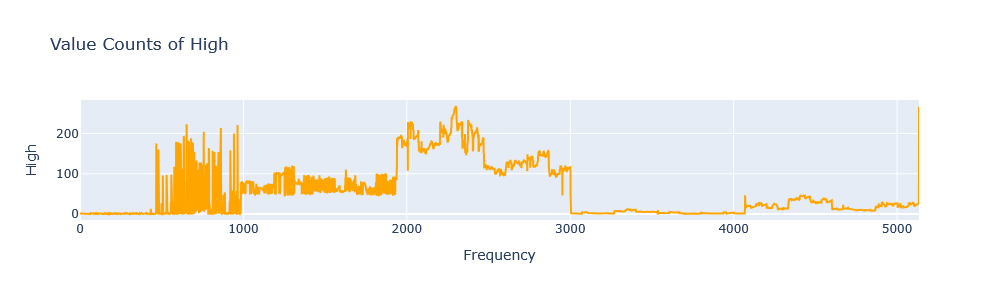

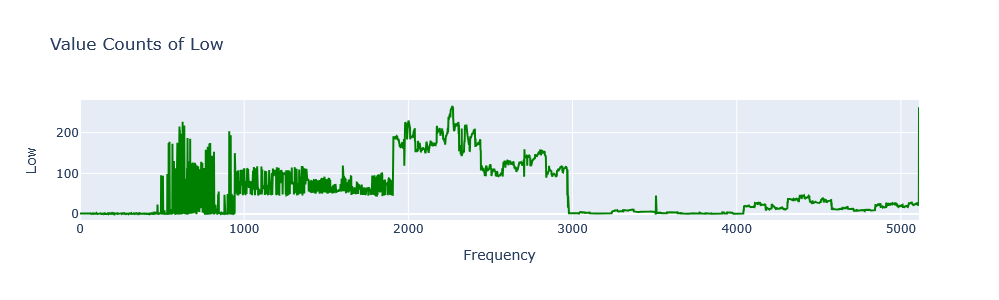

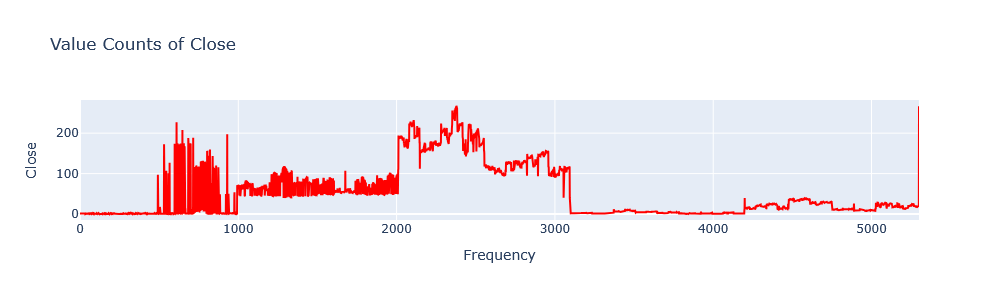

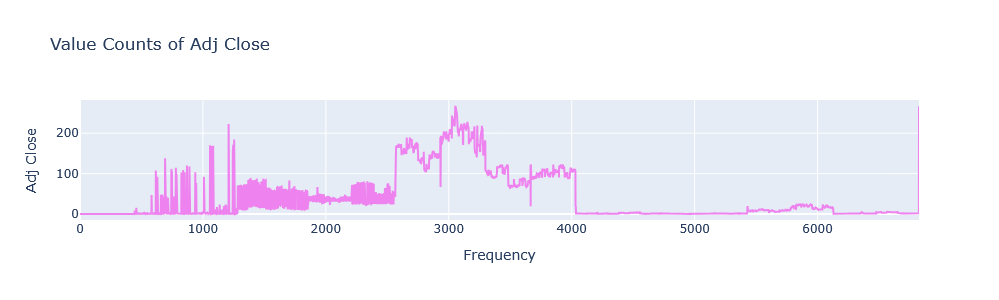

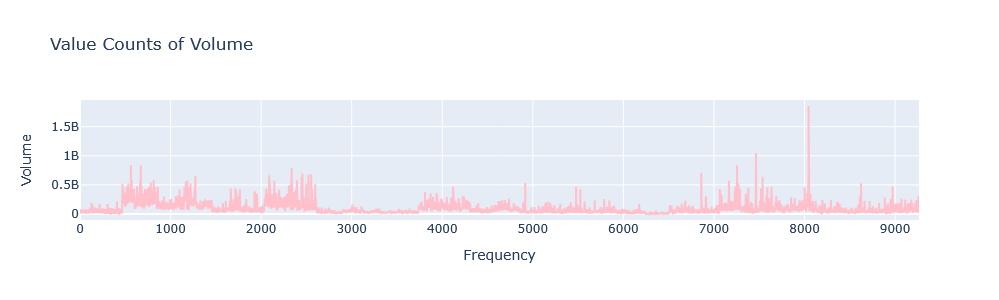

In [209]:
import plotly.express as px
import plotly.graph_objects as go

colors = ["blue", "orange", "green", "red", "violet", "pink", "magenta"]

for col, color in zip(ds.iloc[:, :-1], colors):
    counts = ds[col].value_counts()
    
    fig = go.Figure(data=go.Scatter(
        y=counts.keys(),      # same as counts.index
        mode='lines',   # line with points
        line=dict(color=color, width=2)))
    
    fig.update_layout(
        title=f'Value Counts of {col}',
        yaxis_title=f'{col}',
        xaxis_title='Frequency',
        width=1000,   # width in pixels
        height=300 )  # height in pixels

    fig.show()

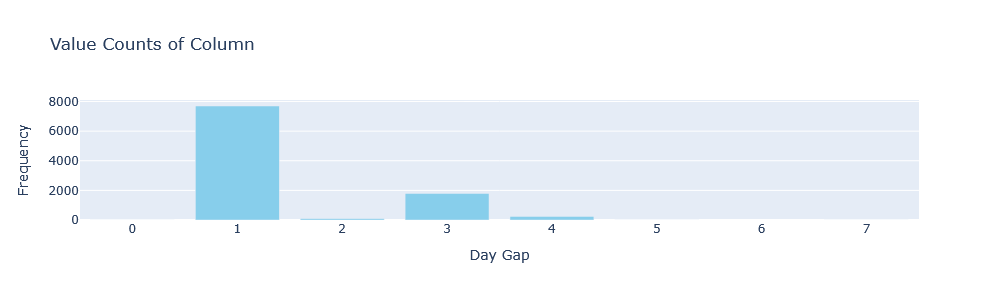

In [211]:
import plotly.graph_objects as go

counts = ds['Day Gap'].value_counts()
fig = go.Figure(data=go.Bar(
    x=counts.index,
    y=counts.values,
    marker_color='skyblue'))

fig.update_layout(
    title='Value Counts of Column',
    xaxis_title='Day Gap',
    yaxis_title='Frequency',
    width=1000,   # width in pixels
    height=300 )  # height in pixels

fig.show()

> Hist Plot

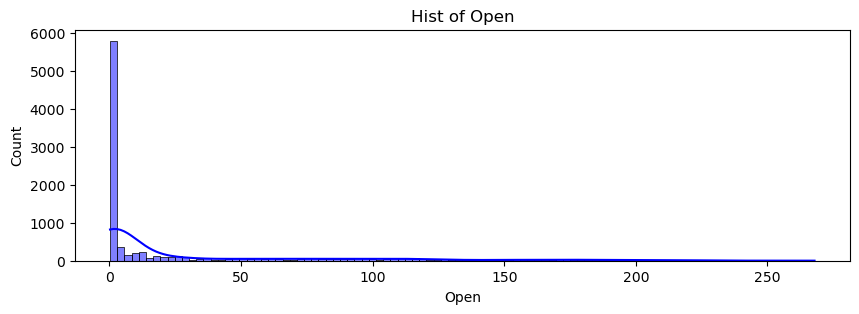

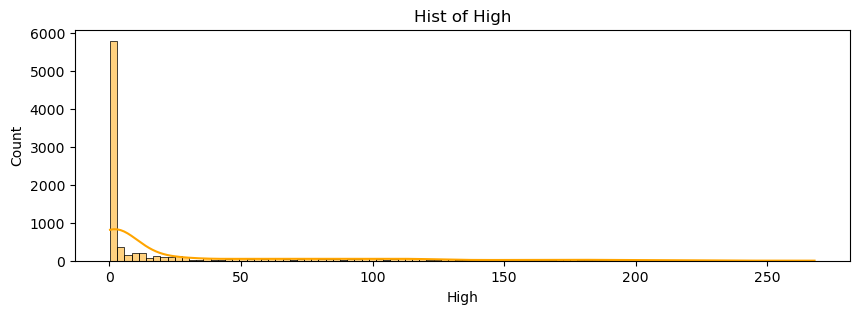

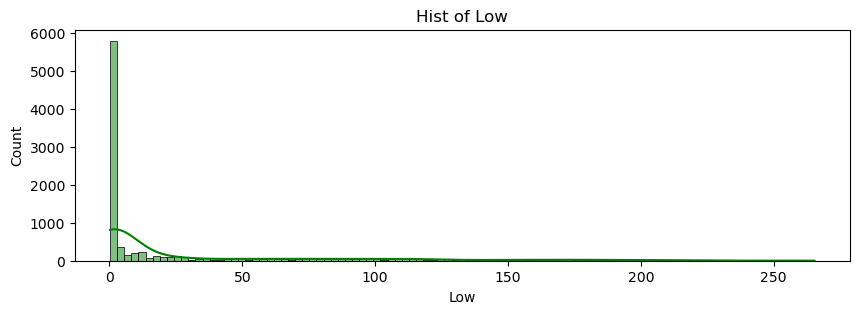

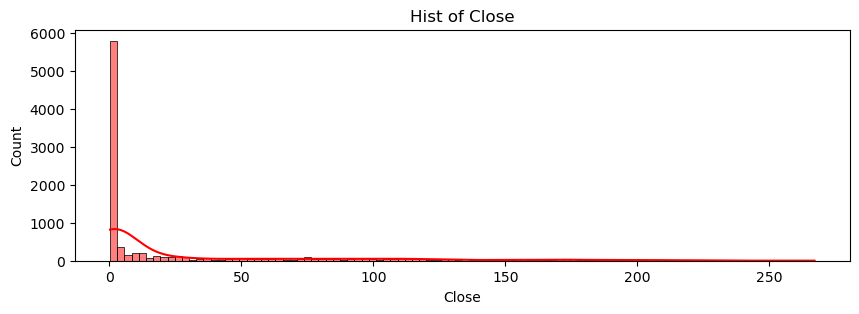

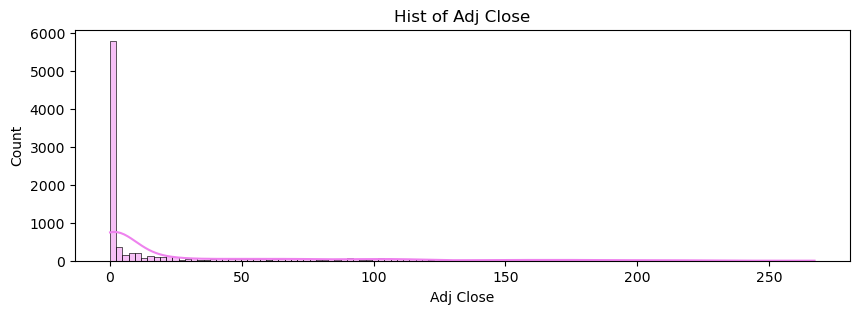

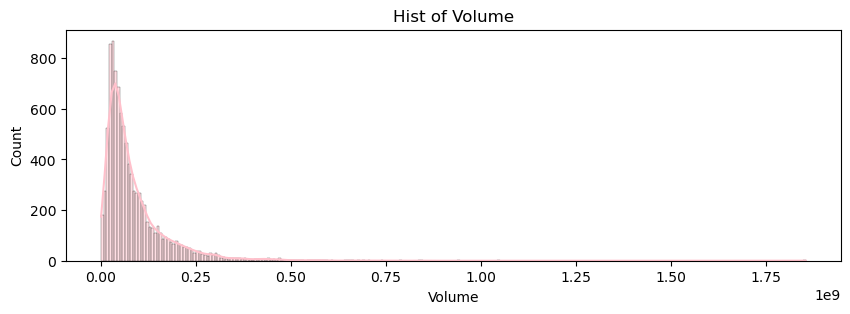

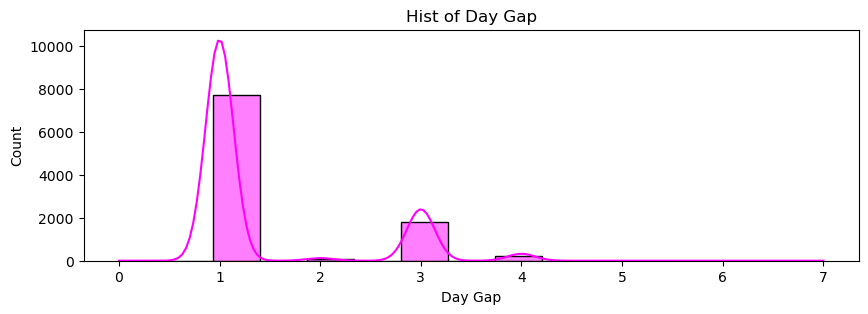

In [117]:
colors = ["blue", "orange", "green", "red", "violet", "pink", "magenta"]

for col, color in zip(ds.columns, colors):
    plt.figure(figsize=(10,3))
    if ds[col].dtype == 'float64':
        sns.histplot(data=ds[col], kde=True, color=color)
        plt.title(f"Hist of {col}")
plt.tight_layout
plt.show()

> ### ***Outlier Detection***

In [48]:
num_col = ds.select_dtypes(include=["number"]).columns.tolist()

In [49]:
print(f"Total Count : {len(ds.iloc[:, -1])}\n")
for col in num_col:
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3-Q1
    outliers = ds[(ds[col] < Q1 - 1.5*IQR) | (ds[col] > Q3 + 1.5*IQR)]
    print(f"{col} - {len(outliers)} outliers and {ds[col].skew():.2f} skewness")

Total Count : 9823

Open - 1723 outliers and 2.00 skewness
High - 1733 outliers and 2.00 skewness
Low - 1739 outliers and 2.00 skewness
Close - 1741 outliers and 2.00 skewness
Adj Close - 1757 outliers and 2.13 skewness
Volume - 691 outliers and 3.48 skewness
Day Gap - 2125 outliers and 1.56 skewness


> ### ***Bivariate Analysis***

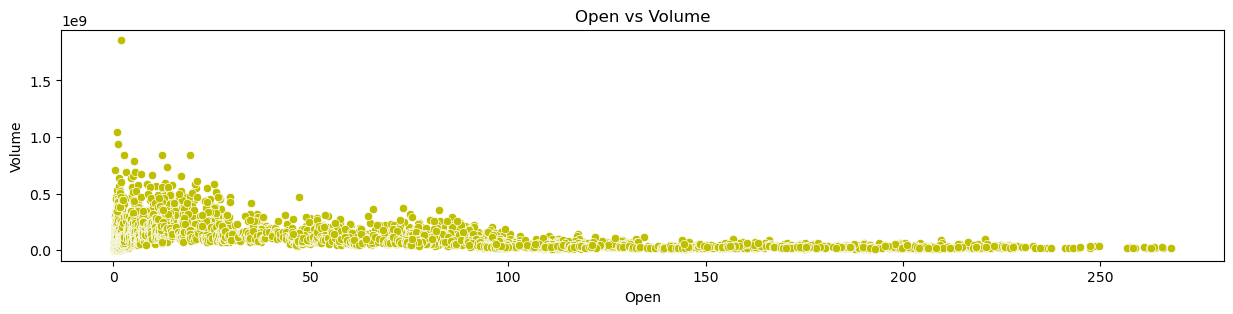

In [51]:
## Relationship between Open and Volume

plt.figure(figsize=(15,3))
sns.scatterplot(data=ds, x=ds['Open'], y=ds['Volume'], color="y")
plt.title("Open vs Volume")
plt.show()

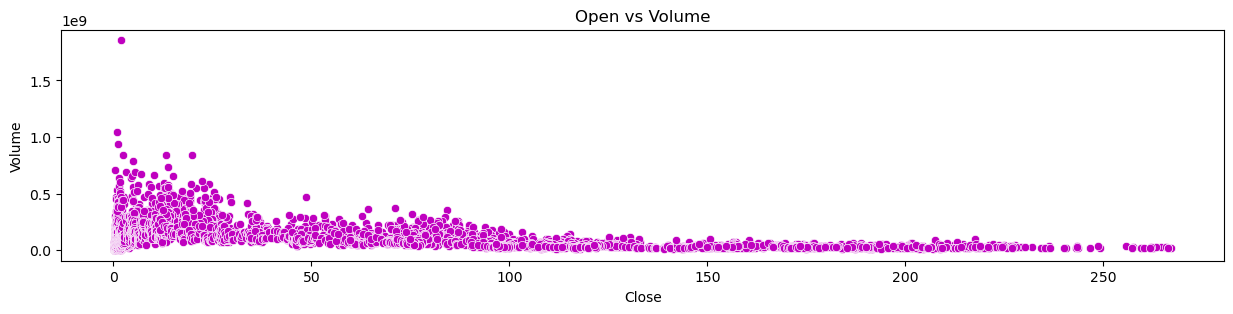

In [52]:
## Relationship between Close and Volume

plt.figure(figsize=(15,3))
sns.scatterplot(data=ds, x=ds['Close'], y=ds['Volume'], color="m")
plt.title("Open vs Volume")
plt.show()

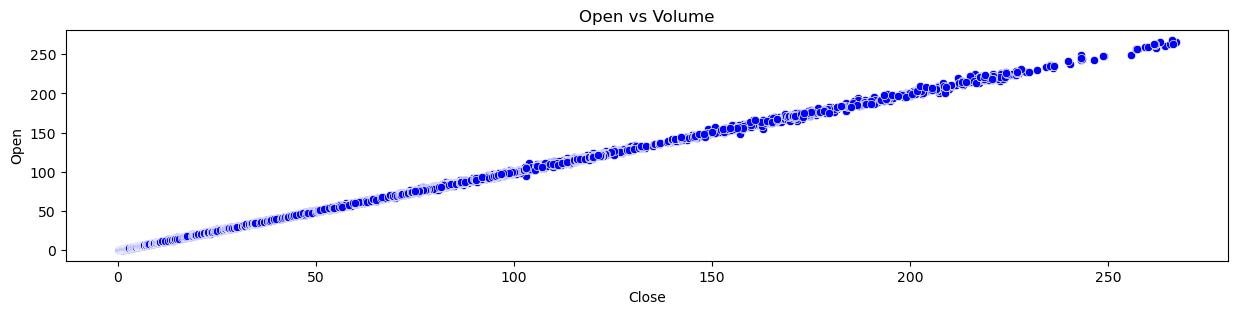

In [53]:
## Relationship between Close and Open

plt.figure(figsize=(15,3))
sns.scatterplot(data=ds, x=ds['Close'], y=ds['Open'], color="b")
plt.title("Open vs Volume")
plt.show()

> ### ***Multivariate Analysis***

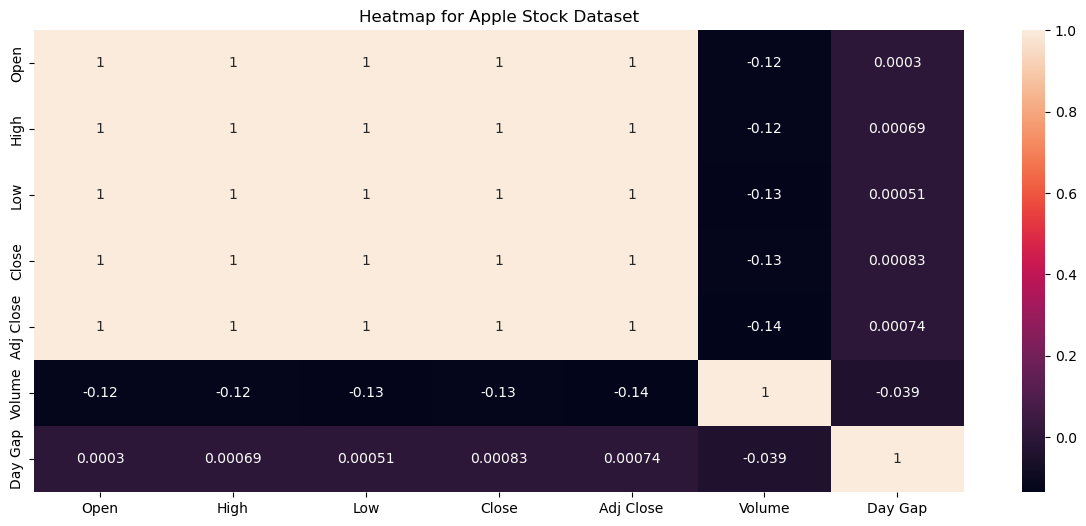

In [55]:
plt.figure(figsize=(15,6))
sns.heatmap(data=ds[num_col].corr(), annot=True)
plt.title("Heatmap for Apple Stock Dataset")
plt.show()

> ### ***Time-Series Analysis***

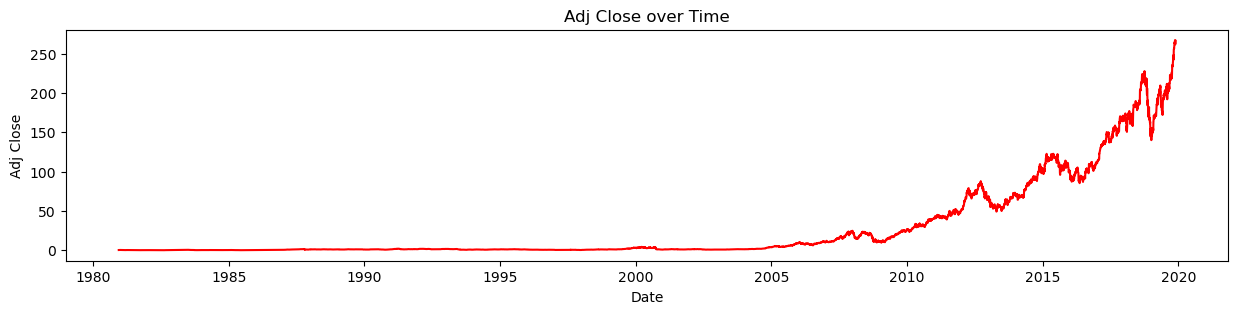

In [57]:
## Relationship between Adj Close and Time Period

plt.figure(figsize=(15,3))
sns.lineplot(data=ds, x=ds.index, y=ds['Adj Close'], color="r")
plt.title("Adj Close over Time")
plt.show()

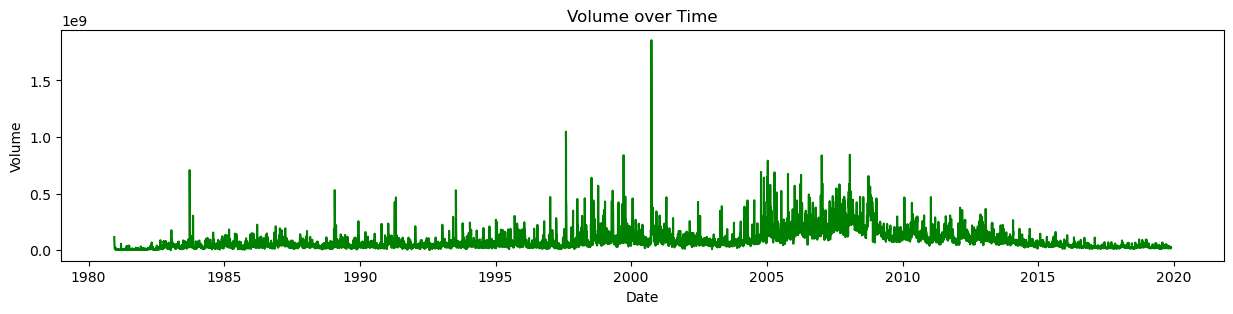

In [58]:
## Relationship between Volume and Time Period

plt.figure(figsize=(15,3))
sns.lineplot(data=ds, x=ds.index, y=ds['Volume'], color="g")
plt.title("Volume over Time")
plt.show()